In [1]:
import pandas as pd
import numpy as np
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import seaborn as sns


import glob
import os


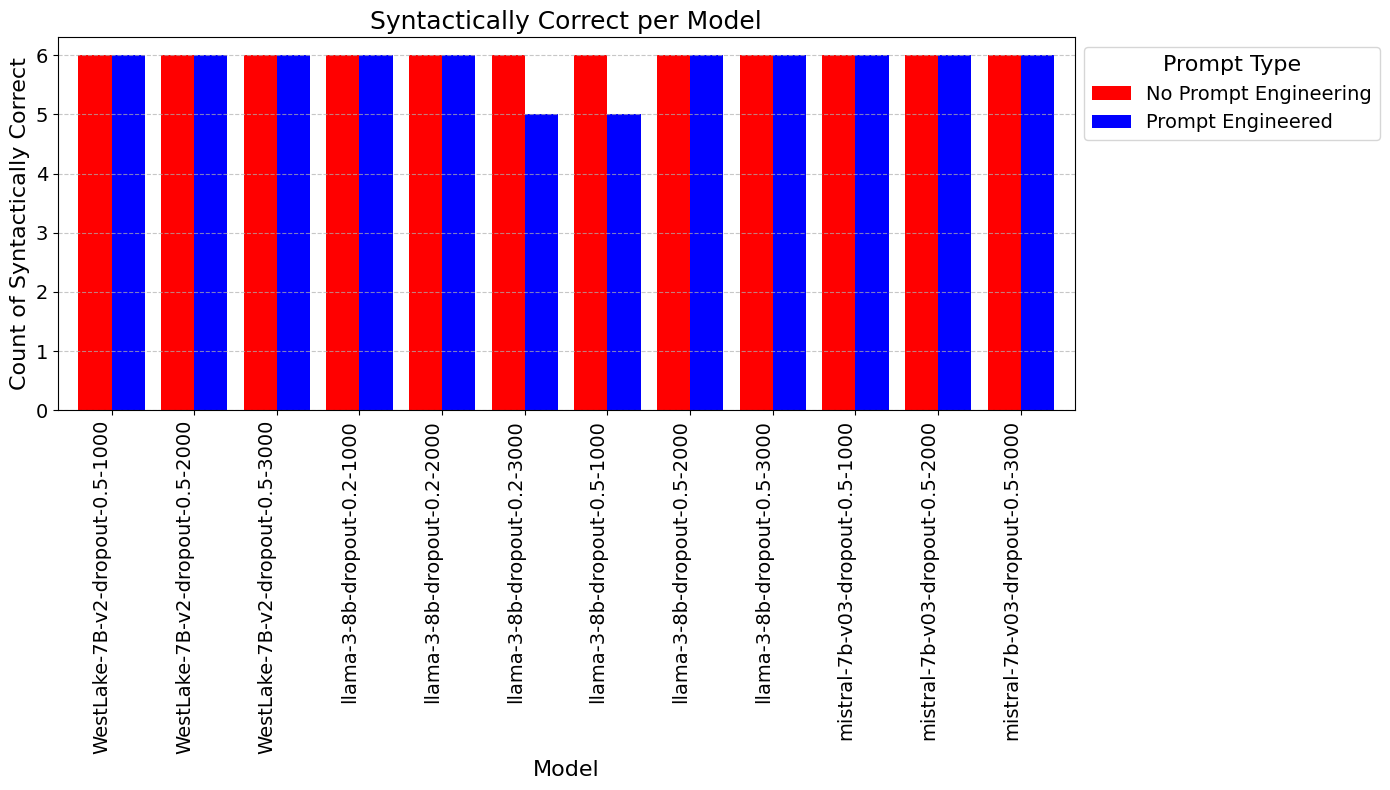

In [2]:
syntactic_correct_df = pd.read_csv('syntactic correct.csv')
syntactic_correct_df = syntactic_correct_df.drop(['Unnamed: 0'],axis=1)



# Convert the columns to a flat format suitable for plotting
def prepare_data(df):
    # Stack the data and reset index to move all headers to columns
    df_stacked = df.stack().reset_index()
    df_stacked.columns = ['Index', 'Model', 'Success']
    df_stacked['Success'] = df_stacked['Success'].apply(lambda x: True if str(x).strip().lower() == 'true' else False)
    return df_stacked

# Prepare the data
plot_data = prepare_data(syntactic_correct_df)

# Extract base model names (without '_eng') for grouping
plot_data['Base Model'] = plot_data['Model'].apply(lambda x: x.replace('_eng', '') if '_eng' in x else x)
plot_data['Prompt Type'] = plot_data['Model'].apply(lambda x: 'Prompt Engineered' if '_eng' in x else 'No Prompt Engineering')

# Calculate success counts per base model and prompt type
success_counts = plot_data.groupby(['Base Model', 'Prompt Type'])['Success'].sum().unstack()

# Plotting the grouped bar chart for success counts
fig, ax = plt.subplots(figsize=(14, 8))

success_counts.plot(kind='bar', ax=ax, color=['red', 'blue'], width=0.8)
ax.set_title('Syntactically Correct per Model', fontsize=18)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Count of Syntactically Correct', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(['No Prompt Engineering', 'Prompt Engineered'], title='Prompt Type', fontsize=14, title_fontsize=16, bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("finetune_Syntactically Correct per Model.png")
plt.show()


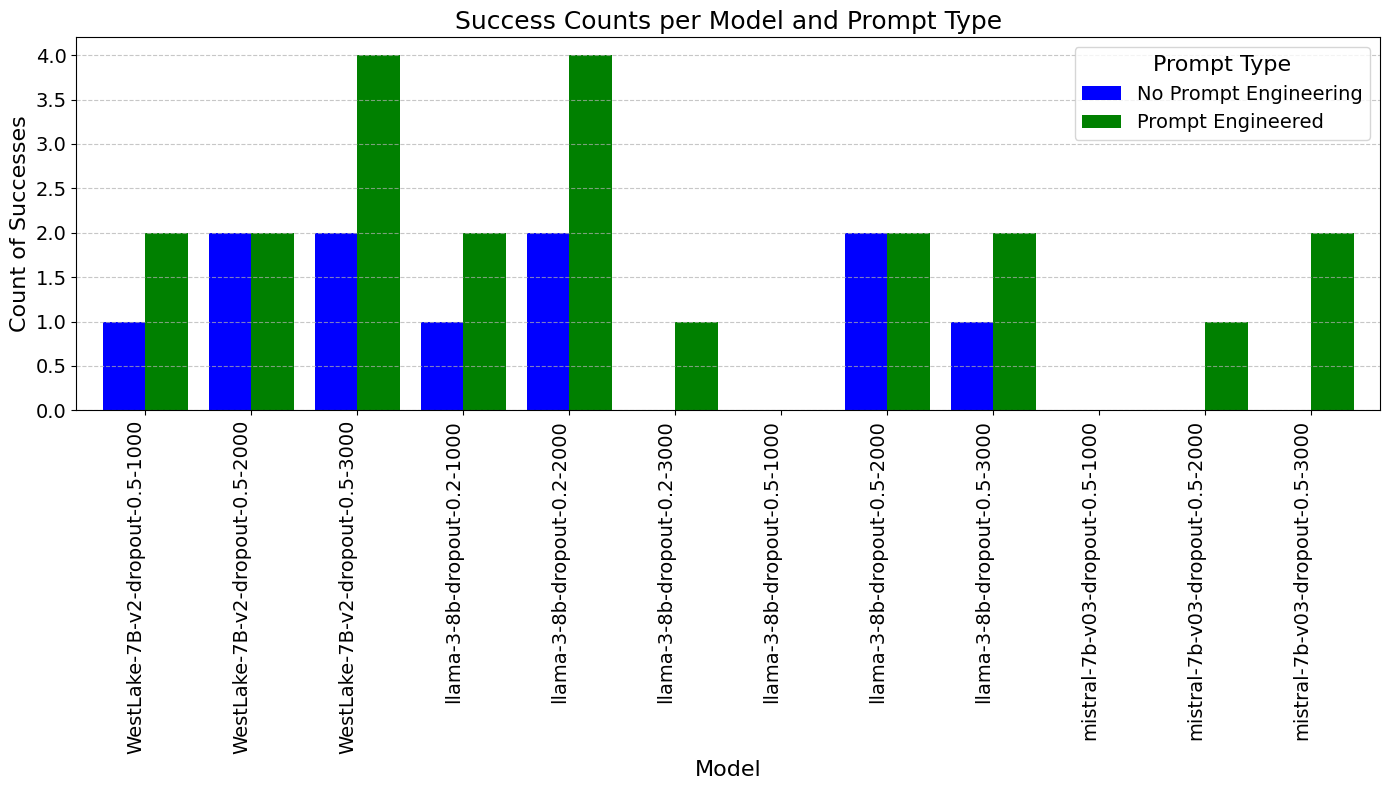

In [3]:
# Load the dataset
df_seccess_rate = pd.read_csv('seccess rate - extracted_info.csv')
df_seccess_rate = df_seccess_rate.drop(['Unnamed: 0'], axis=1)




# Convert the columns to a flat format suitable for plotting
def prepare_data(df):
    # Stack the data and reset index to move all headers to columns
    df_stacked = df.stack().reset_index()
    df_stacked.columns = ['Index', 'Model', 'Success']
    df_stacked['Success'] = df_stacked['Success'].apply(lambda x: True if str(x).strip().lower() == 'true' else False)
    return df_stacked

# Prepare the data
plot_data = prepare_data(df_seccess_rate)

# Extract base model names (without '_eng') for grouping
plot_data['Base Model'] = plot_data['Model'].apply(lambda x: x.replace('_eng', '') if '_eng' in x else x)
plot_data['Prompt Type'] = plot_data['Model'].apply(lambda x: 'Prompt Engineered' if '_eng' in x else 'No Prompt Engineering')

# Calculate success counts per base model and prompt type
success_counts = plot_data.groupby(['Base Model', 'Prompt Type'])['Success'].sum().unstack()

# Plotting the grouped bar chart for success counts
fig, ax = plt.subplots(figsize=(14, 8))

success_counts.plot(kind='bar', ax=ax, color=['blue', 'green'], width=0.8)
ax.set_title('Success Counts per Model and Prompt Type', fontsize=18)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Count of Successes', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(['No Prompt Engineering', 'Prompt Engineered'], title='Prompt Type', fontsize=14, title_fontsize=16, bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("finetune_Success_Counts_per_Model_and_Prompt_Type.png")
plt.show()


In [4]:
txt_files = ['golden label.txt',
    './new/llama-3-8b-dropout-0.2-1000.txt',
 './new/llama-3-8b-dropout-0.2-1000_eng.txt',
 './new/llama-3-8b-dropout-0.2-2000.txt',
 './new/llama-3-8b-dropout-0.2-2000_eng.txt',
 './new/llama-3-8b-dropout-0.2-3000.txt',
 './new/llama-3-8b-dropout-0.2-3000_eng.txt',
#  './new/llama-3-8b-dropout-0.5-1000-DTV.txt',
 './new/llama-3-8b-dropout-0.5-1000.txt',
#  './new/llama-3-8b-dropout-0.5-1000_eng-DTV.txt',
 './new/llama-3-8b-dropout-0.5-1000_eng.txt',
#  './new/llama-3-8b-dropout-0.5-2000-DTV.txt',
#  './new/llama-3-8b-dropout-0.5-2000_eng-DTV.txt',
 './new/llama-3-8b-dropout-0.5-2000.txt',
 './new/llama-3-8b-dropout-0.5-2000_eng.txt',
 './new/llama-3-8b-dropout-0.5-3000.txt',
 './new/llama-3-8b-dropout-0.5-3000_eng.txt',
 
 './new/mistral-7b-v03-dropout-0.5-1000.txt',
 './new/mistral-7b-v03-dropout-0.5-1000_eng.txt',
 './new/mistral-7b-v03-dropout-0.5-2000.txt',
 './new/mistral-7b-v03-dropout-0.5-2000_eng.txt',
 
 './new/mistral-7b-v03-dropout-0.5-3000.txt',
 './new/mistral-7b-v03-dropout-0.5-3000_eng.txt',
 
 './new/WestLake-7B-v2-dropout-0.5-1000.txt',
 './new/WestLake-7B-v2-dropout-0.5-1000_eng.txt',
 './new/WestLake-7B-v2-dropout-0.5-2000.txt',
 './new/WestLake-7B-v2-dropout-0.5-2000_eng.txt',
 './new/WestLake-7B-v2-dropout-0.5-3000.txt',
 './new/WestLake-7B-v2-dropout-0.5-3000_eng.txt',
 
 ]

In [5]:

# List to store the contents of each file
file_contents = {}

# Read each text file and store its content along with the filename
for file_path in txt_files:
    print(file_path)

    with open(file_path, 'r') as file:
        print('file_path',file_path)
        content = file.read()
        content_list = content.split('#######')
        file_contents[file_path.split('.t')[0]] = [item.strip() for item in content_list]


# Create a DataFrame from the list
df = pd.DataFrame(file_contents)

golden label.txt
file_path golden label.txt
./new/llama-3-8b-dropout-0.2-1000.txt
file_path ./new/llama-3-8b-dropout-0.2-1000.txt
./new/llama-3-8b-dropout-0.2-1000_eng.txt
file_path ./new/llama-3-8b-dropout-0.2-1000_eng.txt
./new/llama-3-8b-dropout-0.2-2000.txt
file_path ./new/llama-3-8b-dropout-0.2-2000.txt
./new/llama-3-8b-dropout-0.2-2000_eng.txt
file_path ./new/llama-3-8b-dropout-0.2-2000_eng.txt
./new/llama-3-8b-dropout-0.2-3000.txt
file_path ./new/llama-3-8b-dropout-0.2-3000.txt
./new/llama-3-8b-dropout-0.2-3000_eng.txt
file_path ./new/llama-3-8b-dropout-0.2-3000_eng.txt
./new/llama-3-8b-dropout-0.5-1000.txt
file_path ./new/llama-3-8b-dropout-0.5-1000.txt
./new/llama-3-8b-dropout-0.5-1000_eng.txt
file_path ./new/llama-3-8b-dropout-0.5-1000_eng.txt
./new/llama-3-8b-dropout-0.5-2000.txt
file_path ./new/llama-3-8b-dropout-0.5-2000.txt
./new/llama-3-8b-dropout-0.5-2000_eng.txt
file_path ./new/llama-3-8b-dropout-0.5-2000_eng.txt
./new/llama-3-8b-dropout-0.5-3000.txt
file_path ./new/ll

In [6]:
def rouge_scores(df):
    # Initialize the ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    
    # Function to calculate ROUGE-L
    def calculate_rouge(row, model_name):
        if pd.isna(row[model_name]) or pd.isna(row['golden label']):
            return None  # Skip calculation if either the model or golden label data is missing
        scores = scorer.score(row['golden label'], row[model_name])
        return scores['rougeL'].fmeasure  # Returning the F-measure of ROUGE-L

    # List of model columns to compare with 'golden_label'
    model_columns = [col for col in df.columns if col != 'golden label']  # Exclude the 'golden_label' from comparison list
    
    # Calculate ROUGE-L for each model comparison with 'golden_label'
    for model in model_columns:
        df[f'ROUGE-L_{model}'] = df.apply(calculate_rouge, axis=1, args=(model,))


rouge_scores(df)


In [7]:
# # Extracting columns of interest after renaming
# def extract_and_rename_rouge_columns(df):
#     rouge_columns = [col for col in df.columns if col.startswith('ROUGE-L_')]
#     df_subset = df[rouge_columns].reset_index(drop=True)
#     df_subset.rename(columns=lambda x: x.replace('ROUGE-L_', ''), inplace=True)
#     return df_subset

def extract_and_rename_rouge_columns(df):
    rouge_columns = [col for col in df.columns if col.startswith('ROUGE-L_')]
    df_subset = df[rouge_columns].reset_index(drop=True)
    df_subset.rename(columns=lambda x: x.replace('ROUGE-L_', '').replace('./new/', ''), inplace=True)
    return df_subset




ROUGE_L_df = extract_and_rename_rouge_columns(df)

ROUGE_L_df

,llama-3-8b-dropout-0.2-1000,llama-3-8b-dropout-0.2-1000_eng,llama-3-8b-dropout-0.2-2000,llama-3-8b-dropout-0.2-2000_eng,llama-3-8b-dropout-0.2-3000,llama-3-8b-dropout-0.2-3000_eng,llama-3-8b-dropout-0.5-1000,llama-3-8b-dropout-0.5-1000_eng,llama-3-8b-dropout-0.5-2000,llama-3-8b-dropout-0.5-2000_eng,...,mistral-7b-v03-dropout-0.5-2000,mistral-7b-v03-dropout-0.5-2000_eng,mistral-7b-v03-dropout-0.5-3000,mistral-7b-v03-dropout-0.5-3000_eng,WestLake-7B-v2-dropout-0.5-1000,WestLake-7B-v2-dropout-0.5-1000_eng,WestLake-7B-v2-dropout-0.5-2000,WestLake-7B-v2-dropout-0.5-2000_eng,WestLake-7B-v2-dropout-0.5-3000,WestLake-7B-v2-dropout-0.5-3000_eng
0,0.765432,0.876712,0.650000,1.000000,0.606061,1.000000,0.800000,0.935065,0.840580,1.000000,...,0.845070,0.935065,0.842105,0.974359,0.850000,0.906667,0.746667,0.845070,0.876712,1.000000
1,0.590909,0.819277,0.826087,0.891566,0.882353,0.931818,0.704545,0.775000,0.906977,0.804878,...,0.917647,0.942529,0.557692,0.860465,0.931818,0.917647,0.953488,0.864198,0.953488,0.933333
2,0.846154,0.800000,0.731183,0.800000,0.750000,0.820513,0.843373,0.705882,0.821053,0.702703,...,0.800000,0.800000,0.809524,0.717391,0.902439,0.795181,0.731707,0.794872,0.904762,0.752941
3,0.629630,0.779661,0.478261,0.838710,0.741935,0.838710,0.641509,0.862069,0.478261,0.690909,...,0.478261,0.933333,0.641509,1.000000,0.541667,0.690909,0.478261,0.800000,0.478261,0.800000
4,0.754098,0.758621,0.603774,0.466019,0.793103,0.750000,0.677419,0.793103,0.596491,0.774194,...,0.571429,0.769231,0.571429,0.656250,0.571429,0.754098,0.782609,0.703704,0.571429,0.703704
5,0.692308,0.545455,0.866667,1.000000,0.514286,0.529412,0.692308,0.545455,0.866667,1.000000,...,0.444444,1.000000,0.450000,1.000000,0.709677,1.000000,1.000000,1.000000,0.600000,0.812500


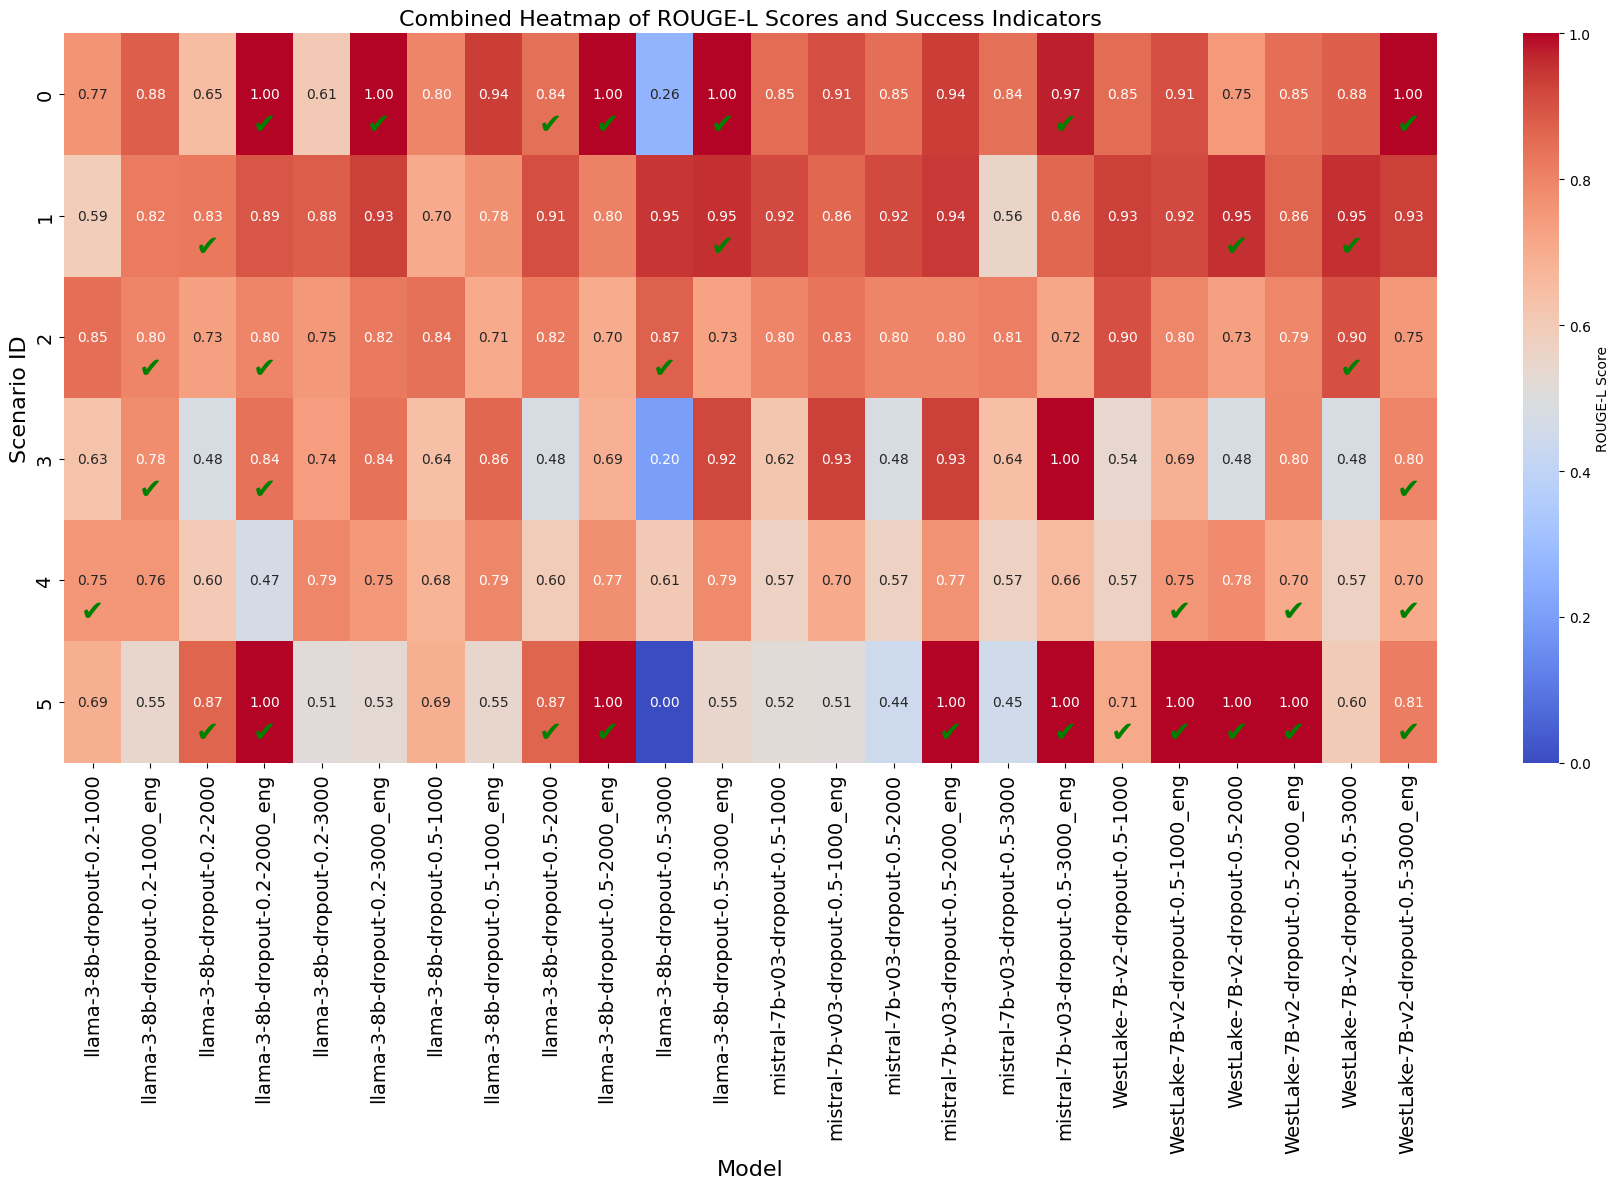

In [8]:
# Ensure both dataframes have the same column order and structure
assert list(df_seccess_rate.columns) == list(ROUGE_L_df.columns), "Column mismatch between dataframes"

# Create a combined heatmap
fig, ax = plt.subplots(figsize=(18, 12))

# Plot ROUGE-L scores heatmap
sns.heatmap(ROUGE_L_df, annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1,
            cbar_kws={'label': 'ROUGE-L Score'}, fmt='.2f', ax=ax, annot_kws={"size": 10})

# Add success indicators
for y in range(ROUGE_L_df.shape[0]):
    for x in range(ROUGE_L_df.shape[1]):
        value = df_seccess_rate.iloc[y, x]
        # print(value)
        if value in ['True', 'TRUE', 'true',np.True_]:
            # print(value)
            ax.text(x + 0.5, y + 0.75, '✔', color='green', ha='center', va='center', fontsize=20)
        else:
            pass
            # ax.text(x + 0.5, y + 0.75, '✘', color='black', ha='center', va='center', fontsize=16)

# Set titles and labels
ax.set_title("Combined Heatmap of ROUGE-L Scores and Success Indicators", fontsize=16)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Scenario ID', fontsize=16)
ax.tick_params(axis='x', labelsize=14, rotation=90)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig("Combined_Heatmap_with_Success_Indicators.png")
plt.show()


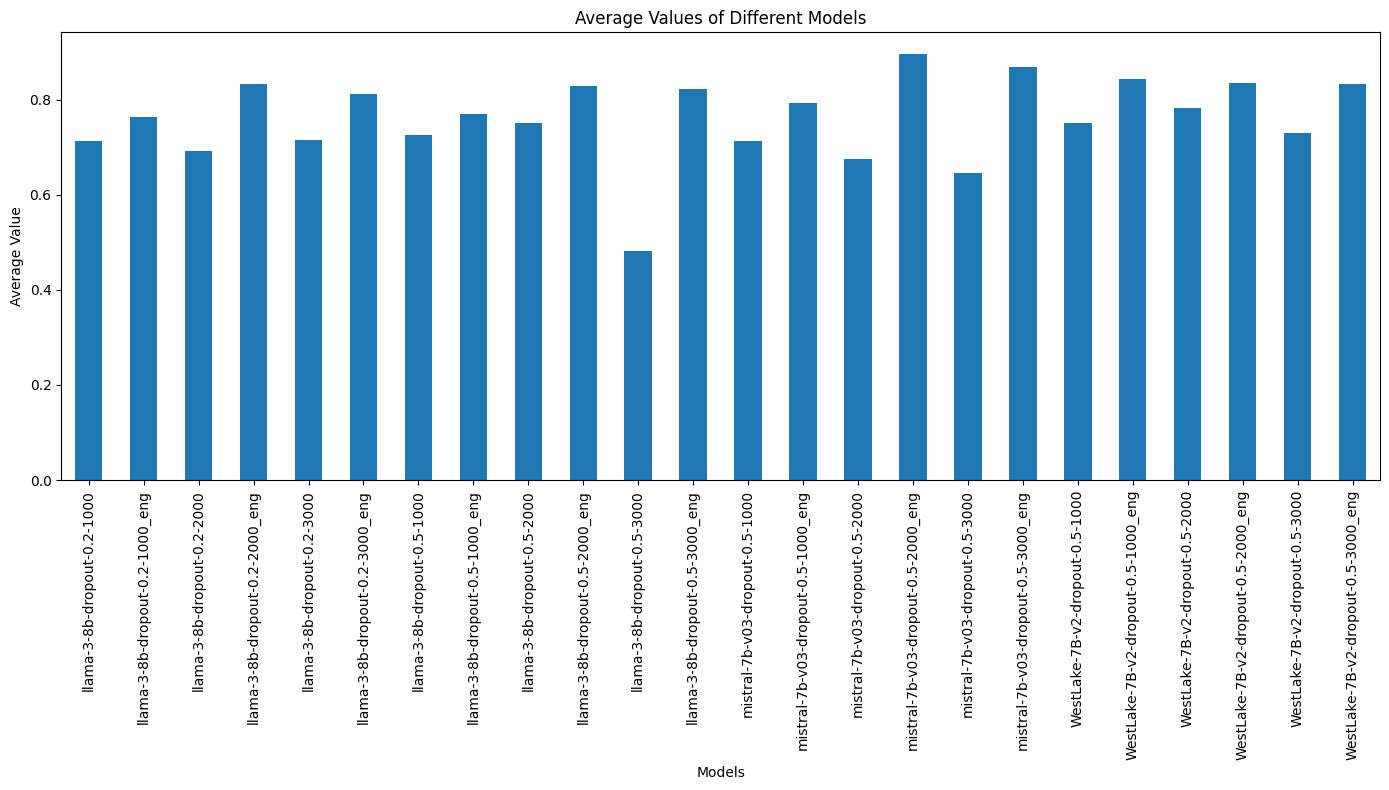

In [9]:
# Calculate the average for each model
averages = ROUGE_L_df.mean()

# Plot the averages
plt.figure(figsize=(14, 8))
averages.plot(kind='bar')
plt.title('Average Values of Different Models')
plt.xlabel('Models')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

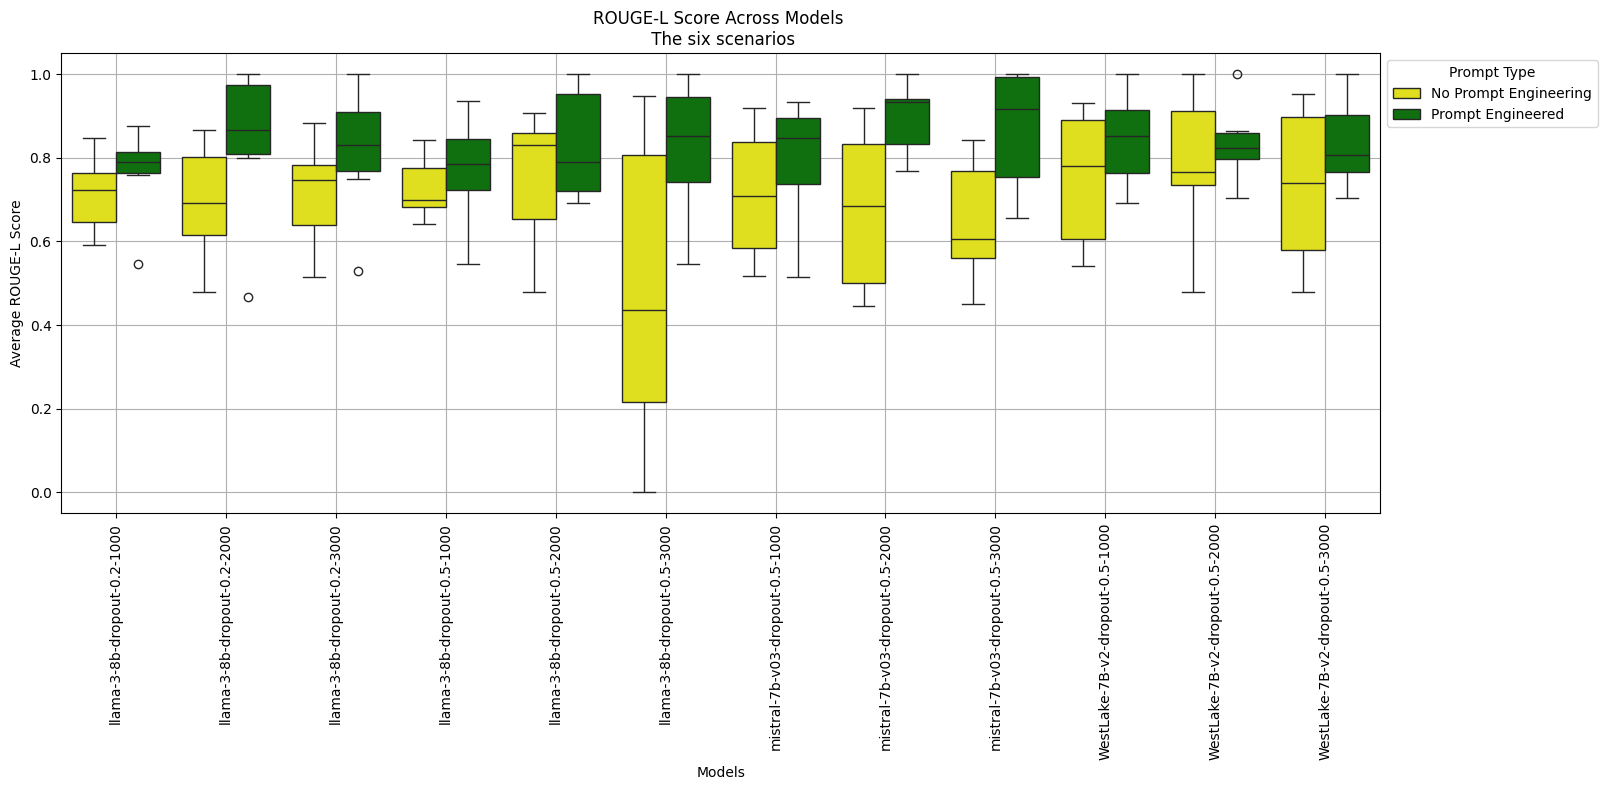

In [10]:
# Prepare the data for plotting
df_melted = ROUGE_L_df.melt(var_name='Model', value_name='ROUGE-L Score')
df_melted['Base Model'] = df_melted['Model'].apply(lambda x: x.replace('_eng', '') if '_eng' in x else x)
df_melted['Prompt Type'] = df_melted['Model'].apply(lambda x: 'Prompt Engineered' if '_eng' in x else 'No Prompt Engineering')

# Plot the data as a box plot with different colors for prompt types
plt.figure(figsize=(14, 8))
box = sns.boxplot(x='Base Model', y='ROUGE-L Score', hue='Prompt Type', data=df_melted, palette={'No Prompt Engineering': 'yellow', 'Prompt Engineered': 'green'})
plt.title('ROUGE-L Score Across Models \n The six scenarios')
plt.xlabel('Models')
plt.ylabel('Average ROUGE-L Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Prompt Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

plt.savefig("ROUGE-L Score Across Models The six scenarios.png")
# Display the plot
plt.show()

In [11]:
# # Convert the data to a DataFrame
# df = ROUGE_L_df
# # Plot the data as a box plot with yellow boxes
# plt.figure(figsize=(14, 8))
# box = df.boxplot(rot=90, patch_artist=True)

# # Set the color of each box to yellow
# for patch in box.artists:
#     patch.set_facecolor('yellow')

# plt.title('ROUGE-L score across models Models')
# plt.xlabel('Models')
# plt.ylabel('Average ROUGE-L score')
# plt.tight_layout()

# # Display the plot
# plt.show()



# Non-Functional BT

In [12]:
# # Path to the directory containing the CSV files
# directory_path = './csv/'

# # List all files in the directory
# file_list = os.listdir(directory_path)

# # Filter the list to include only CSV files
# csv_files = [file for file in file_list if file.endswith('.csv')]


# ######

# # Read all CSV files into a list of dataframes
# dataframes = [pd.read_csv(f'./csv/{file}') for file in csv_files]

# # Combine all dataframes into a single dataframe
# combined_df = pd.concat(dataframes, keys=[(file.split('/')[-1]).split('.c')[0] for file in file_list])

# # Calculate the average similarity for each model configuration
# average_similarity = combined_df.groupby(level=0)['similarity'].mean().reset_index()
# average_similarity.columns = ['Model Configuration', 'Average Similarity']



./csv/


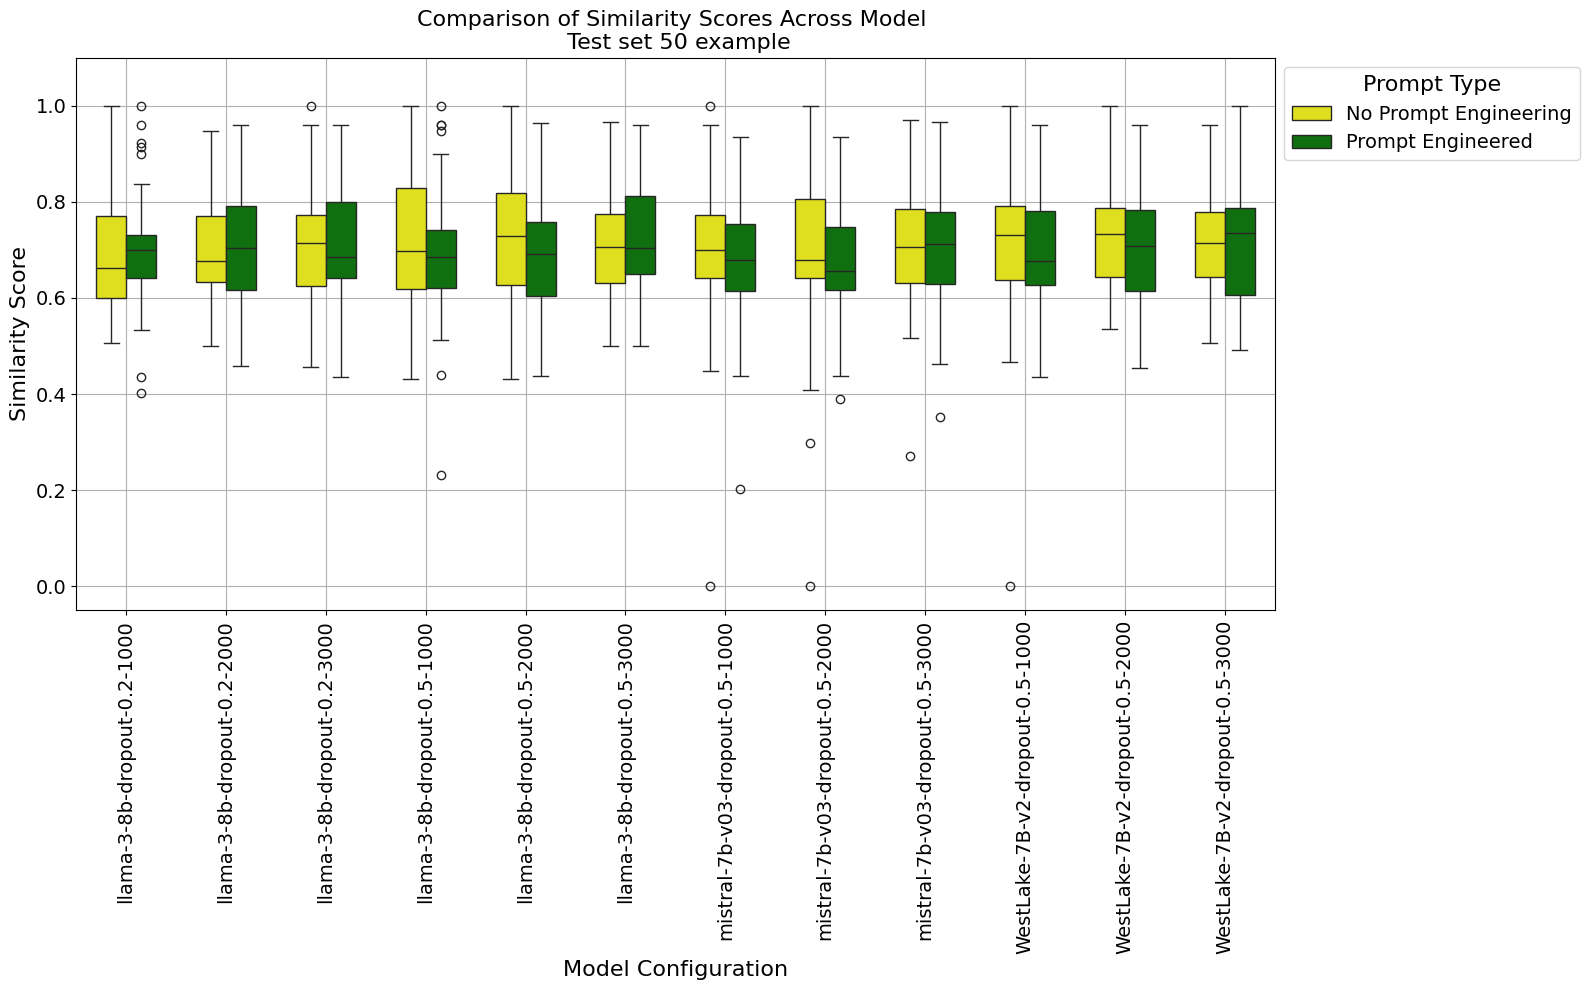

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the function to read all CSV files and prepare the data
def prepare_data(directory_path):
    file_list = os.listdir(directory_path)
    csv_files = [file for file in file_list if file.endswith('.csv')]
    dataframes = [pd.read_csv(os.path.join(directory_path, file)) for file in csv_files]
    combined_df = pd.concat(dataframes, keys=[os.path.splitext(file)[0] for file in csv_files])
    combined_df.reset_index(level=0, inplace=True)
    combined_df.columns = ['Model Configuration'] + list(combined_df.columns[1:])
    return combined_df

# Path to the directory containing the CSV files
directory_path = './csv/'
print(directory_path)

# Prepare the combined data
combined_df = prepare_data(directory_path)

# Convert the columns to a flat format suitable for Seaborn's boxplot
def prepare_plot_data(df):
    df_melted = df.melt(id_vars='Model Configuration', var_name='Metric', value_name='Score')
    return df_melted

# Prepare the plot data
plot_data = prepare_plot_data(combined_df)

# Filter out the 'Metric' that are not similarity
plot_data = plot_data[plot_data['Metric'] == 'similarity']

# Add base model and prompt type columns
plot_data['Base Model'] = plot_data['Model Configuration'].apply(lambda x: x.replace('_eng', '') if '_eng' in x else x)
plot_data['Prompt Type'] = plot_data['Model Configuration'].apply(lambda x: 'Prompt Engineered' if '_eng' in x else 'No Prompt Engineering')

# Calculate the average similarity score for each model configuration
average_similarity = plot_data.groupby('Model Configuration')['Score'].mean().reset_index()
average_similarity.columns = ['Model Configuration', 'Average Similarity']

# Plotting the box plot for similarity scores
plt.figure(figsize=(16, 10))
boxplot = sns.boxplot(x='Base Model', y='Score', hue='Prompt Type', data=plot_data, width=0.6, palette={'No Prompt Engineering': 'yellow', 'Prompt Engineered': 'green'})  # Adjust box width
plt.title('Comparison of Similarity Scores Across Model \n Test set 50 example', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Model Configuration', fontsize=16)
plt.ylabel('Similarity Score', fontsize=16)
plt.legend(title='Prompt Type', bbox_to_anchor=(1, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.grid(True)

# Adjust spacing between the models
plt.ylim(None, 1.1)
plt.tight_layout()
plt.savefig("Similarity_Scores_Across_Models_and_Techniques.png")
plt.show()


In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Define the function to read all CSV files and prepare the data
# def prepare_data(directory_path):
#     file_list = os.listdir(directory_path)
#     csv_files = [file for file in file_list if file.endswith('.csv')]
#     dataframes = [pd.read_csv(os.path.join(directory_path, file)) for file in csv_files]
#     combined_df = pd.concat(dataframes, keys=[os.path.splitext(file)[0] for file in csv_files])
#     combined_df.reset_index(level=0, inplace=True)
#     combined_df.columns = ['Model Configuration'] + list(combined_df.columns[1:])
#     return combined_df

# # Path to the directory containing the CSV files
# directory_path = './csv/'
# print(directory_path)

# # Prepare the combined data
# combined_df = prepare_data(directory_path)

# # Convert the columns to a flat format suitable for Seaborn's boxplot
# def prepare_plot_data(df):
#     df_melted = df.melt(id_vars='Model Configuration', var_name='Metric', value_name='Score')
#     return df_melted

# # Prepare the plot data
# plot_data = prepare_plot_data(combined_df)

# # Filter out the 'Metric' that are not similarity
# plot_data = plot_data[plot_data['Metric'] == 'similarity']

# # Calculate the average similarity score for each model configuration
# average_similarity = plot_data.groupby('Model Configuration')['Score'].mean().reset_index()
# average_similarity.columns = ['Model Configuration', 'Average Similarity']



# # Plotting the box plot for similarity scores
# plt.figure(figsize=(16, 10))
# boxplot = sns.boxplot(x='Model Configuration', y='Score', data=plot_data, width=0.6)  # Adjust box width
# plt.title('Comparison of Similarity Scores Across Model Configurations', fontsize=16)
# plt.xticks(rotation=90, fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Model Configuration', fontsize=16)
# plt.ylabel('Similarity Score', fontsize=16)
# # plt.legend(title='Prompting Technique', bbox_to_anchor=(1, 1), loc='upper left', fontsize=16)
# plt.grid(True)

# # Adjust spacing between the models
# plt.ylim(None, 1.1)
# plt.tight_layout()
# plt.savefig("Similarity_Scores_Across_Models_and_Techniques.png")
# plt.show()


In [55]:
# Print the average similarity scores
average_similarity


,Model Configuration,Average Similarity
0,WestLake-7B-v2,0.0
1,WestLake-7B-v2-dropout-0.5-1000,0.707878
2,WestLake-7B-v2-dropout-0.5-1000-eng,0.708241
3,WestLake-7B-v2-dropout-0.5-2000,0.731493
4,WestLake-7B-v2-dropout-0.5-2000-eng,0.699363
5,WestLake-7B-v2-dropout-0.5-3000,0.719841
6,WestLake-7B-v2-dropout-0.5-3000-eng,0.711509
7,WestLake-7B-v2-eng,0.629933
8,llama-3-8b-bnb-4bit,0.122465
9,llama-3-8b-bnb-4bit-eng,0.701439
